# Histogram creation
*   Input: 
    1.   Una lista de arrays Numpy con distribuciones de números.
    2.   Lista con encabezados de texto para cada distribuión.
    3.   Bin size. -> Imagina que en el eje X hay 256 valores representados, ¿qué pasa si no necesita encontrar la cantidad de píxeles para todos los valores de píxeles por separado, sino el número de píxeles en un intervalo de valores de píxeles? por ejemplo, necesita encontrar la cantidad de píxeles entre 0 y 15, luego 16 a 31, …, 240 a 255. Necesitará solo 16 valores para representar el histograma. Entonces, lo que hace es simplemente dividir el histograma completo en 16 subintervalos y el valor de cada subintervalo es la suma de todos los recuentos de píxeles en él. Cada uno de estos subintervalos se denomina “BIN” (o columna en español). En el primer caso, el número de BINS era 256 (una por cada píxel), mientras que en el segundo caso, es solo 16.
*   Output: 
    Un gráfico con: 
    1.   Creación de histograma 
    2.   Average (promedio) y 4 líneas verticales
    3.   3 líneas verticales sigma
    4.   Nº de Observaciones en la escala logarítmica
    5.   N distribuciones diferentes.



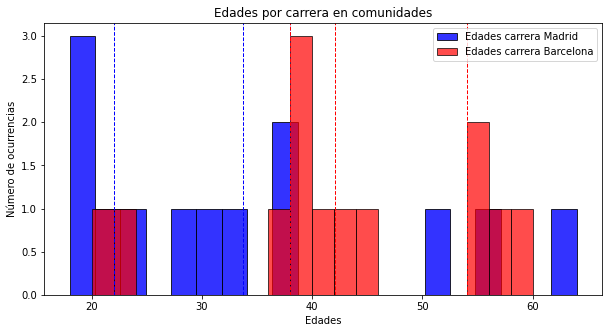

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

def histogramCreation(distribuciones, encabezados, binSize):
  plt.figure(figsize=(10,5))
  
  n, bins, patches = plt.hist(distribuciones[0], bins=binSize, color = 'blue',edgecolor='k', label= encabezados[0], alpha=0.8)
  n, bins, patches = plt.hist(distribuciones[1], bins=binSize, facecolor='red', edgecolor='k', label=encabezados[1], alpha=0.7)
  plt.legend(loc = 'best') # Legenda de cada distribución

  # Media, y quartiles
  plt.axvline(distribuciones[0].mean(), color='blue', linestyle = 'dashed', linewidth=1)
  plt.axvline(np.percentile( distribuciones[0],25), color ='blue', linestyle = 'dashed', linewidth=1)
  plt.axvline(np.percentile(distribuciones[0],75),color='blue', linestyle='dashed', linewidth=1)

  plt.axvline(distribuciones[1].mean(), color='red', linestyle='dashed', linewidth= 1)
  plt.axvline(np.percentile(distribuciones[1],25), color='red', linestyle='dashed', linewidth=1)
  plt.axvline(np.percentile(distribuciones[1],75), color='red', linestyle='dashed', linewidth=1)


  # Labels y mostrar
  plt.title('Edades por carrera en comunidades')
  plt.xlabel('Edades')
  plt.ylabel('Número de ocurrencias')

  #En escala logaritmica
  #plt.yscale('log')

  plt.show()


# Histograma que muestre la cantidad de personas participantes en una carrera por edad en Madrid y en Barcelona
edadesMadrid = np.array([20,23,22,18,37,52,38,29,32,18,55,64,30])
edadesBarcelona = np.array([54,40,56,45,39,36,20,38,43,22,39,55,60])
distribuciones = [edadesMadrid, edadesBarcelona]
encabezados = ['Edades carrera Madrid', 'Edades carrera Barcelona']
binSize = 20

histogramCreation(distribuciones, encabezados, binSize)


In [0]:
# Datos del nº de mascarillas repartidas en algunas comunidades autónomas
# Datos sacados de https://www.lasexta.com/noticias/nacional/reparto-mascarillas-comunidades-autonomas-consulta-aqui-como-cuantas-repartiran-cada-territorio_202004125e937f36a8aed200012a2292.html
numeroMascarillas = np.array([1870000, 296000, 228.000, 240000,480000,130000,432000 ,508000, 1700000, 1400000])
comunidad = ['Andalucía', 'Aragón', 'Asturias', 'Baleares',' Canarias', 'Cantabria', 'C. la Mancha', 'C. y León', 'Cataluña', 'Madrid']

# Correlation Matrix
*   Input: 
    1.   Una matriz numpy con 2 ejes (axis) diferentes. Un eje para eventos (filos) y otro para categorías (columnas).
    2.   Lista de qué columnas usar y cuales no están definidas por el número de columna.

    3.   Lista de encabezados por columna
*   Output: 
    Un gráfico con: 
    1.   Correlación entre las diferentes columnas en un formato cuadrado
    2.   Números impresos en la correlación

                Estudian mucho  Estudian poco  ...  Aprueban  Suspenden
Estudian mucho            1.00           0.00  ...      0.75        0.1
Estudian poco             0.00           1.00  ...      0.10        0.9
Estudian algo             0.25           0.25  ...      0.50        0.5
Aprueban                  0.75           0.10  ...      1.00        0.0
Suspenden                 0.10           0.90  ...      0.00        1.0

[5 rows x 5 columns]


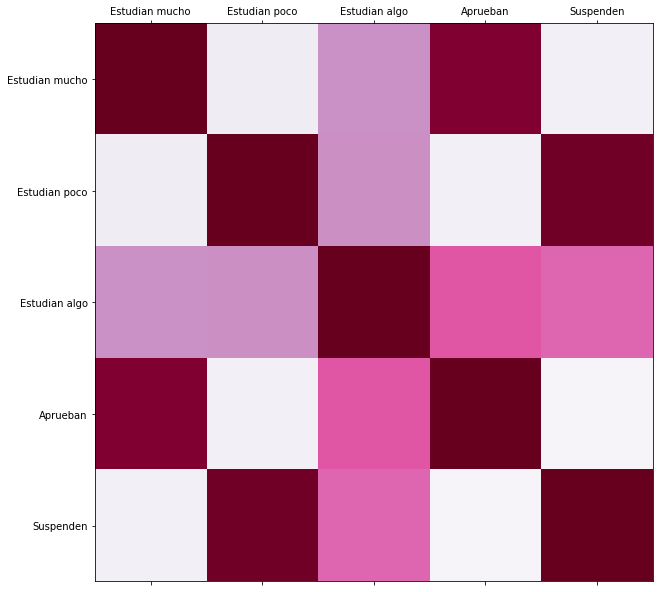

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def correlationMatrix(matriz, columnas, encabezados ):

  # Para poder crear la matriz de correlación utilizaremos pandas, para ello tenemos que crear un dataframe: 
  df = pd.DataFrame(data=matriz, index=encabezados, columns= encabezados)
  print(df)
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(10,30))
  ax.matshow(corr, cmap='PuRd')
  plt.xticks(range(len(corr.columns)), corr.columns);
  plt.yticks(range(len(corr.columns)), corr.columns);
  plt.show()
    

    
    
    
matriz=np.array([[1.00, 0, 0.25, 0.75, 0.10],
                [0, 1.0, 0.25, 0.10, 0.90 ],
                [0.25, 0.25, 1.0, 0.50, 0.50],
                [0.75, 0.10, 0.50, 1.0, 0],
                [0.10, 0.90, 0.50, 0, 1.0]])
encabezados=['Estudian mucho', 'Estudian poco', 'Estudian algo','Aprueban', 'Suspenden']
correlationMatrix(matriz,0,encabezados)


# Correlation multi-variable
*   Input: 
    1.   Una matriz numpy con 2 ejes (axis) diferentes. Un eje para eventos (filas) y otro para categorías (columnas).
    2.   Lista de qué columnas usar y cuales no están definidas por el número de columna.

    3.   Lista de encabezados por columna
*   Output: 
    Un gráfico con: 
    1.   Plot con los números distribuidos y una línea de tendencia
    2.   Histograma de distribución general en la diagonal principal
    3.   Números impresos en la correlación

                Estudian mucho  Estudian poco  ...  Aprueban  Suspenden
Estudian mucho            1.00           0.00  ...      0.75        0.1
Estudian poco             0.00           1.00  ...      0.10        0.9
Estudian algo             0.25           0.25  ...      0.50        0.5
Aprueban                  0.75           0.10  ...      1.00        0.0
Suspenden                 0.10           0.90  ...      0.00        1.0

[5 rows x 5 columns]


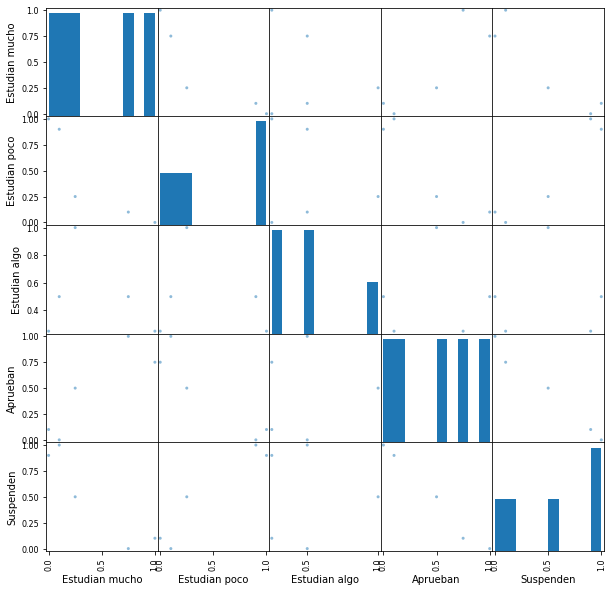

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def correlationMultivariable(matriz, columnas, encabezados ):

  # Para poder crear la matriz de correlación utilizaremos pandas, para ello tenemos que crear un dataframe: 
  df = pd.DataFrame(data=matriz, index=encabezados, columns= encabezados)
  print(df)
  pd.plotting.scatter_matrix(df, figsize=(10,10), diagonal='hist')
  plt.show()
    

    
    
    
matriz=np.array([[1.00, 0, 0.25, 0.75, 0.10],
                [0, 1.0, 0.25, 0.10, 0.90 ],
                [0.25, 0.25, 1.0, 0.50, 0.50],
                [0.75, 0.10, 0.50, 1.0, 0],
                [0.10, 0.90, 0.50, 0, 1.0]])
encabezados=['Estudian mucho', 'Estudian poco', 'Estudian algo','Aprueban', 'Suspenden']
correlationMultivariable(matriz,0,encabezados)

# Confusion Matrix
*   Input: 
    1.   2 arrays numpy con 2 ejes (axis) diferentes. Un eje para eventos (filas) y otro para categorías (columnas)
    2.   El array numpy uno es de referencia y el array 2 estima los valores
    3.   Lista de qué columnas usar y cuales no están definidas por el número de columna.

    4.   Lista de encabezados por columna
*   Output: 
    Un gráfico con: 
    1.   % de eventos estimados vs eventos disponibles
    2.   Números impresos en la correlación


[[1 1 0 0 0]
 [0 2 0 0 0]
 [0 0 1 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
         Clase A  Clase B  Clase C  Clase D  Clase E
Clase A        1        1        0        0        0
Clase B        0        2        0        0        0
Clase C        0        0        1        1        0
Clase D        0        0        0        1        0
Clase E        0        0        0        0        1


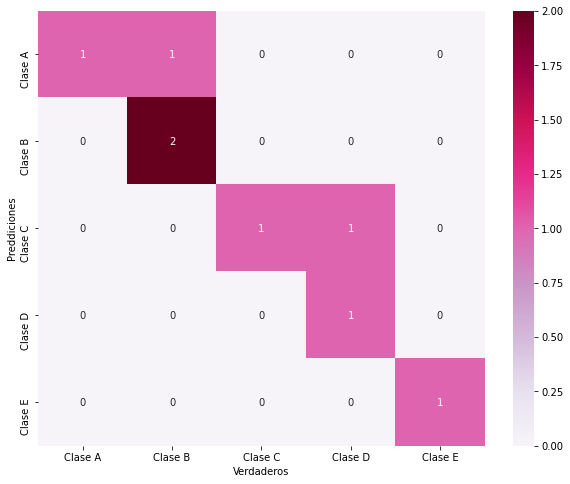

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix #Vamos a utilizar scikit learn para que cree la matriz de confusion
import seaborn as sns # Para dibujar la matriz de confusión
from string import ascii_uppercase # Para hacer los encabezados de la [A-Z]

def confusionMatrix(verd,pred, encabezados):
  conf = confusion_matrix (verd, pred)
  print(conf) 
    # Cuando más grandes sean los valores de la diagonal principal el modelo 
    #    funciona mejor 
    # Los unos significan que ese nº se predijo bien una vez, el 2 que se predijo 2 veces y así
    #   i.e., El dos se predijo bien dos veces, el 4 solo una vez
    #   Vemos que los nºs que están fuera de la diagonal son los que no se predijeron bien 
  df = pd.DataFrame(data=conf, index=encabezados, columns= encabezados)
  print(df)

  fig, ax = plt.subplots(figsize=(10,8))

  grafica = sns.heatmap(df, cmap = 'PuRd', annot = True)

  plt.ylabel('Valores verdaderos')
  plt.xlabel('Valores predicción')
  grafica.set(xlabel='Verdaderos',ylabel='Preddiciones')
  plt.show()


  

valoresVerdaderos =np.array([1,1,2,3,4,6,2,3]) # Valores verdaderos
valoresPredic = np.array([1,2,2,3,4,6,2,4]) # Valores que predice el modelo
encabezados=['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(valoresPredic))]]
confusionMatrix(valoresVerdaderos, valoresPredic, encabezados)

# Word Cloud
Crea una word cloud

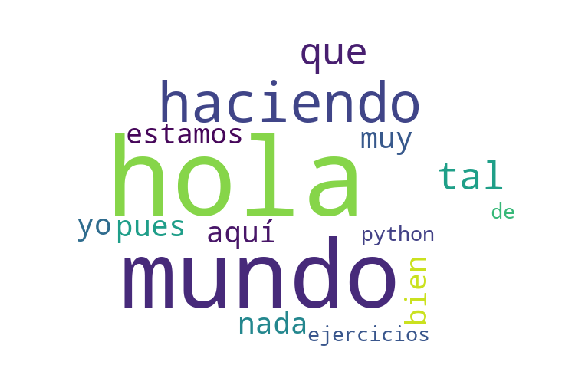

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Para crear el wordcloud
import numpy as np # Numpy esta vez lo utilizaremos para crear la máscara, es decir, subiremos una foto que dará la forma al word cloud
from PIL import Image # Para poder cargar una imagen 

def wordCloud (texto): 

  maskWC = np.array(Image.open('pez_mask.jpg')) 

  cloud = WordCloud(background_color='white', mask = maskWC ).generate(texto)
  
  fig, axis = plt.subplots(figsize=(10,8))
  plt.imshow(cloud) # Imshow display data as an image
  plt.axis('off')
  plt.show()

texto= 'Hola hola hola hola hola hola hola hola que tal yo muy bien Hola hola hola que tal pues nada aquí estamos haciendo haciendo haciendo haciendo haciendo ejercicios de python mundo mundo mundo mundo mundo mundo mundo mundo '
wordCloud(texto)

In [3]:
!pip install PILLOW

You should consider upgrading via the 'c:\users\sandr\anaconda3\python.exe -m pip install --upgrade pip' command.
